# PREDICTING HEART DISEASE RATE USING LOGISTIC REGRESSION

This project aims to predict the likelihood of an individual developing heart disease within the next 10 years. Using a range of parameters including demographic data, lifestyle factors, and medical history, the goal is to build a predictive model. Key features include:

Sex: Gender of the patient (Nominal)

Age: Age of the patient (Continuous)

Current Smoker: Smoking status (Nominal)

Cigs Per Day: Average daily cigarette consumption (Continuous)

BPMeds: Use of blood pressure medication (Nominal)

Prevalent Stroke: History of stroke (Nominal)

PrevalentHyp: Hypertension status (Nominal)

Diabetes: Presence of diabetes (Nominal)

TotChol: Total cholesterol level (Continuous)

SysBP: Systolic blood pressure (Continuous)

DiaBP: Diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

Heart Rate: Heart rate (Continuous)

Glucose: Glucose level (Continuous)

The model's output is a binary classification indicating whether the individual is at risk of coronary heart disease (CHD) in the next decade ("1" for Yes, "0" for No).

### Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Data Pre-processing

In [2]:
hdr = pd.read_csv('framingham.csv')

In [3]:
hdr.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
hdr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
hdr.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
hdr.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
hdr.shape

(4238, 16)

In [8]:
# finding null values
hdr.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<Axes: >

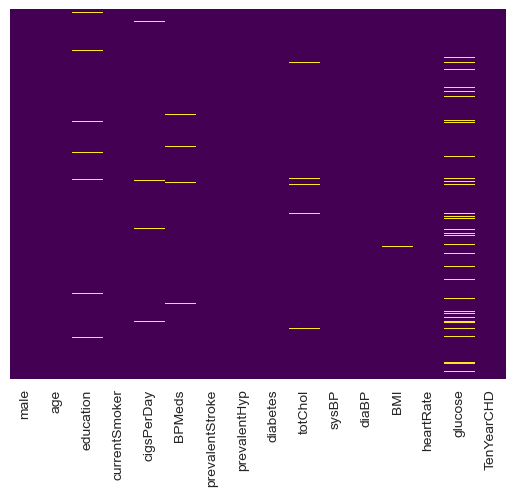

In [9]:
#plotting the heatmap
sns.heatmap(data=hdr.isnull(), yticklabels=False, 
            cbar=False, cmap='viridis' )

In [10]:
#dropping the values
hdr.drop('education', axis=1 , inplace=True)
hdr.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
#replacing null values
hdr.mean()

male                 0.429212
age                 49.584946
currentSmoker        0.494101
cigsPerDay           9.003089
BPMeds               0.029630
prevalentStroke      0.005899
prevalentHyp         0.310524
diabetes             0.025720
totChol            236.721585
sysBP              132.352407
diaBP               82.893464
BMI                 25.802008
heartRate           75.878924
glucose             81.966753
TenYearCHD           0.151958
dtype: float64

In [12]:
hdr[['cigsPerDay','totChol','BMI', 'glucose', 'heartRate']] = hdr[['cigsPerDay','totChol','BMI', 'glucose', 'heartRate']].fillna(hdr[['cigsPerDay','totChol','BMI', 'glucose', 'heartRate']].mean())

In [13]:
hdr[['BPMeds']]=hdr[['BPMeds']].fillna(0)

In [14]:
hdr.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<Axes: >

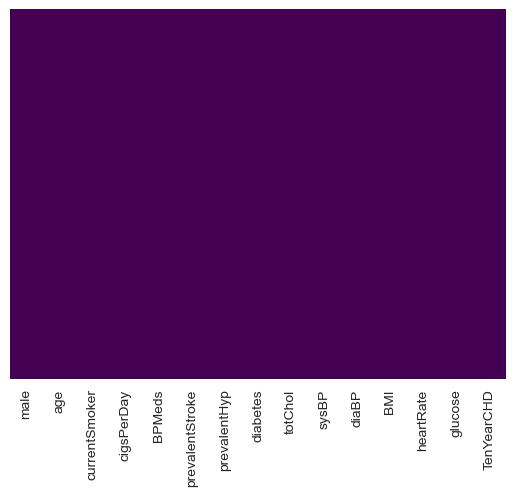

In [15]:
sns.heatmap(data=hdr.isnull(), yticklabels=False, 
            cbar=False, cmap='viridis' )

In [16]:
hdr.shape

(4238, 15)

In [17]:
hdr.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029259,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.879230,0.168552,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Performing EDA to garner insights from dataset


<Axes: xlabel='TenYearCHD', ylabel='count'>

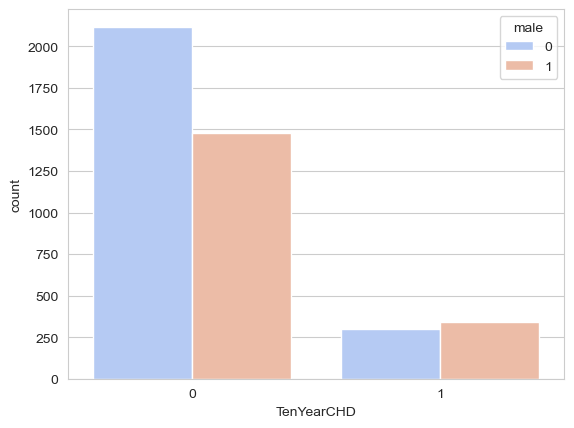

In [18]:
sns.countplot(x='TenYearCHD',hue='male', data=hdr , palette='coolwarm')

<Axes: xlabel='currentSmoker', ylabel='count'>

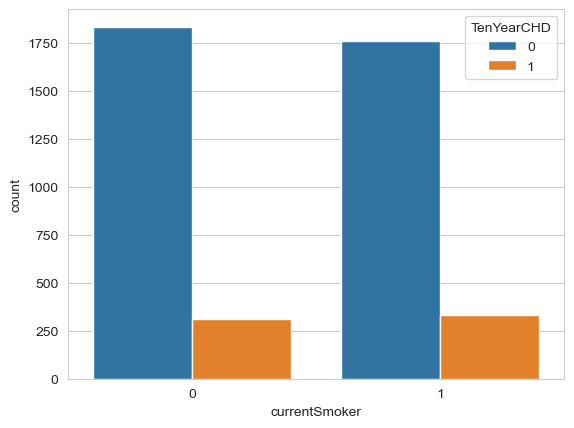

In [19]:
sns.countplot(x='currentSmoker',hue ='TenYearCHD',data=hdr)

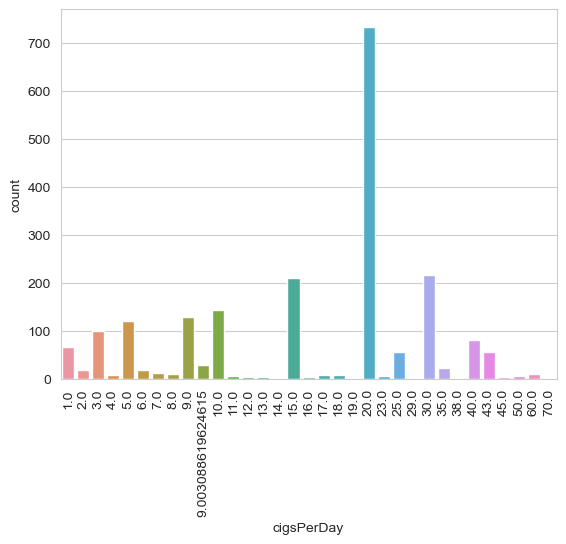

In [20]:
sns.countplot(x=hdr[(hdr["currentSmoker"]==1)]["cigsPerDay"])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='prevalentStroke', ylabel='count'>

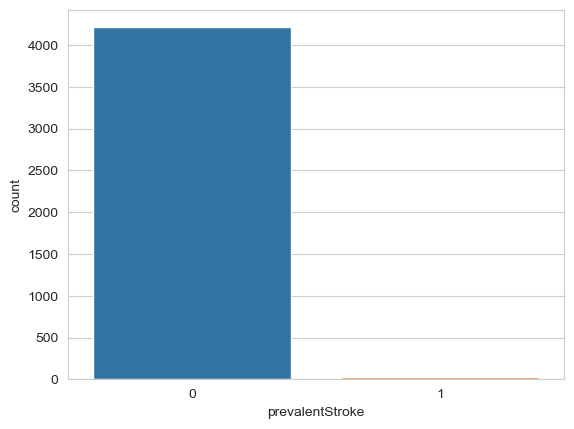

In [21]:
sns.countplot(x='prevalentStroke', data= hdr)

<Axes: xlabel='prevalentHyp', ylabel='count'>

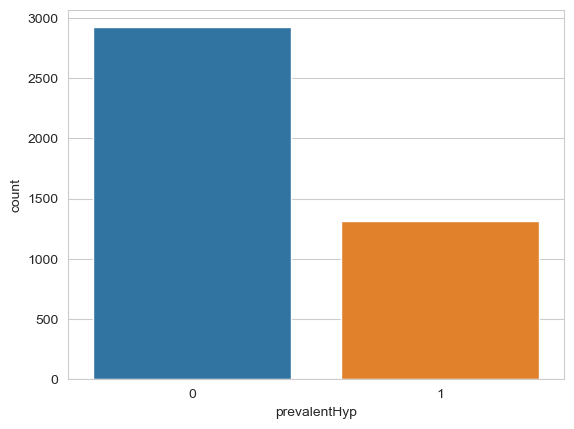

In [22]:
sns.countplot(x='prevalentHyp', data= hdr)

<Axes: ylabel='Frequency'>

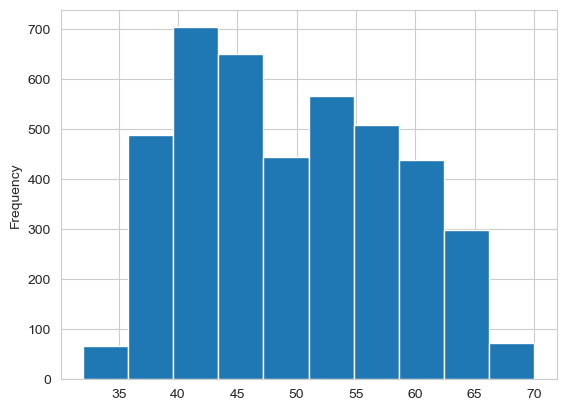

In [23]:
hdr['age'].plot.hist()

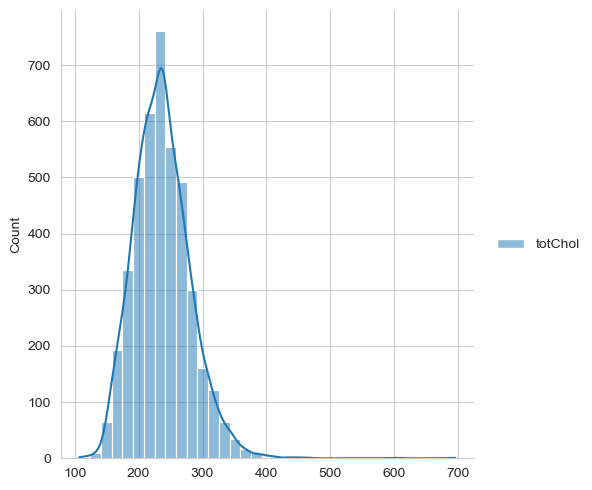

In [24]:
sns.displot(hdr[['totChol']].dropna(), kde=True, bins=35)

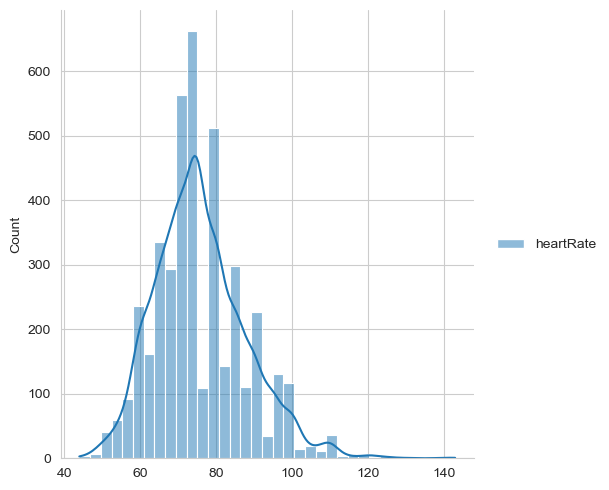

In [25]:
sns.displot(hdr[['heartRate']].dropna(), kde=True, bins=35)

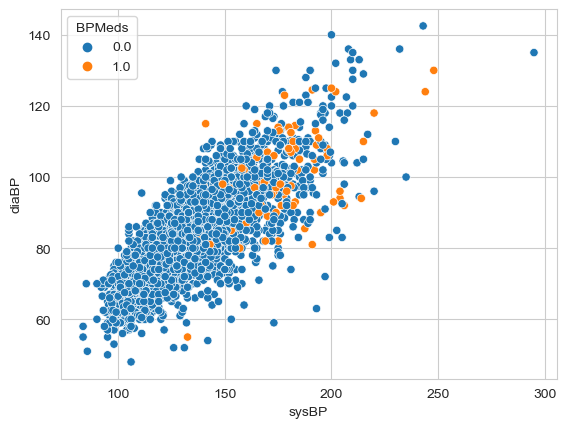

In [26]:
sns.scatterplot(x=hdr["sysBP"],y=hdr["diaBP"],hue=hdr["BPMeds"])
plt.show()

<b>FINDING CORRELATION<b>

In [27]:
correlation = hdr.corr()
correlation

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.197596,0.316807,-0.051545,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.213748,-0.192366,0.120955,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
currentSmoker,0.197596,-0.213748,1.000000,0.766970,-0.048358,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.316807,-0.192366,0.766970,1.000000,-0.045663,-0.032706,-0.065947,-0.037063,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,-0.056088,0.057775
BPMeds,-0.051545,0.120955,-0.048358,-0.045663,1.000000,0.114609,0.258697,0.051394,0.078712,0.251503,0.192356,0.099647,0.015139,0.048856,0.086417
prevalentStroke,-0.004546,0.057655,-0.032988,-0.032706,0.114609,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.103260,-0.065947,0.258697,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.044295,-0.037063,0.051394,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.046285,-0.026025,0.078712,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624
sysBP,-0.035989,0.394302,-0.130230,-0.088505,0.251503,0.057009,0.696755,0.111283,0.207609,1.000000,0.784002,0.325247,0.182174,0.134608,0.216429


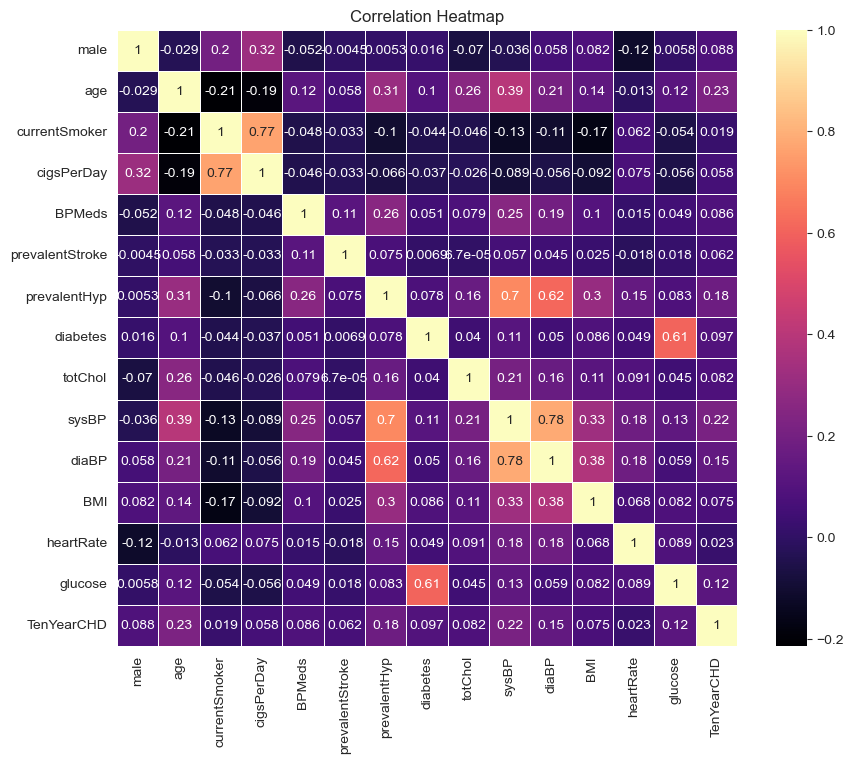

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot= True , cmap='magma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<b>TEST-TRAIN SPLIT<b>

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [30]:
x = hdr.drop('TenYearCHD',axis=1)

In [31]:
y=hdr['TenYearCHD']

In [32]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

<b>FITTING REGRESSION MODEL<b>

In [33]:
logmod=LogisticRegression()

In [34]:
logmod.fit(x_train,y_train)

LogisticRegression()

<b>MAKING PREDICTIONS<b>

In [35]:
result=logmod.predict(x_test)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<b>ACCURACY<b>

In [36]:
accuracy= accuracy_score(y_test , result)
accuracy*100
#show result as percentage

86.08490566037736

<b>EVALUATION<b>

In [37]:
#import metrics used to create confusion matrix
from sklearn import metrics

In [38]:
#this will result a matrix which shows us that where errors are made
#rows represent actual outcomes and columns represent predictions we made.
c_matrix= metrics.confusion_matrix(y_test , result)
c_matrix

array([[725,   1],
       [117,   5]], dtype=int64)

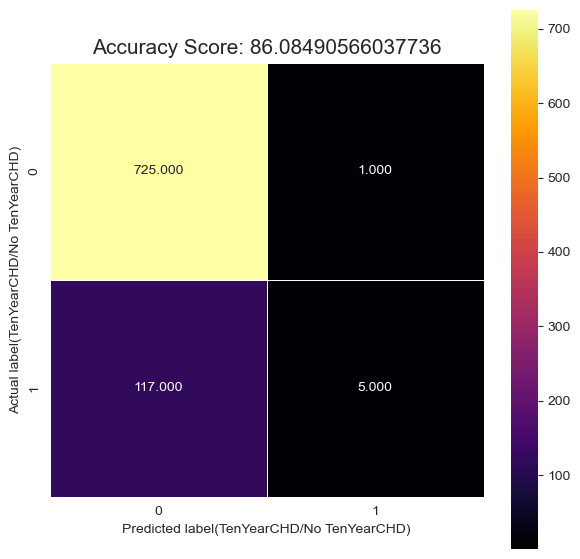

In [39]:
plt.figure(figsize=(7,7))
sns.heatmap(c_matrix , annot=True , fmt=".3f" , linewidths=.5, square=True , cmap='inferno');
plt.ylabel('Actual label(TenYearCHD/No TenYearCHD)');
plt.xlabel('Predicted label(TenYearCHD/No TenYearCHD)');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy*100)
plt.title(all_sample_title, size=15);

The Confusion Matrix shows 717+7=724 correct predictions and 120+4=124 incorrect ones.

True Positives:7

True Negatives:717

False Positives:4(Type 1 error)

False Negatives:120(Type 2 error)

## CONCLUSION

Closing our heart disease prediction project with an accuracy score of 86%, our achieved accuracy holds promise and offers insights for informed decisions. 

This project is more than data – it's a step towards healthier lives. With each prediction, we move closer to a healthier future, armed with newfound knowledge and a commitment to better health assessment practices.

In [40]:
#Test Case 1
arr=[[1,60,0,0,0,0,1,0,200,140,90,30,75,100]]
prd=logmod.predict(arr)
print("Predicted TenYearCHD:",prd[0])

Predicted TenYearCHD: 0


In [41]:
#Test Case 2
arr1=[[0,35,1,10,0,0,0,0,180,120,80,25,65,90]]
prd=logmod.predict(arr1)
print("Predicted TenYearCHD:",prd[0])

Predicted TenYearCHD: 0


In [42]:
#Test Case 3
arr2=[[1,40,0,0,0,0,0,0,170,110,70,22,60,80]]
prd=logmod.predict(arr2)
print("Predicted TenYearCHD:",prd[0])

Predicted TenYearCHD: 0


In [43]:
#Test Case 4
arr3=[[0,75,1,30,1,0,1,1,260,180,100,32,90,250]]
prd=logmod.predict(arr3)
print("Predicted TenYearCHD:",prd[0])

Predicted TenYearCHD: 1


# THANK YOU